In [4]:
from QuantLib import *
import matplotlib.pyplot as plt
%matplotlib inline

European option for AAPL

strike: 130  
maturity date: 15th, Jan, 2016  
spot price: 127.62  
volatility: 20%  
dividend yield: 1.63%  
Current Date: 8th May, 2015  

In [5]:
maturity_date = Date(15, 1, 2016)
spot_price = 127.62
strike_price = 130
volatility = 0.20
dividend_rate = 0.0163
option_type = Option.Call

risk_free_rate = 0.001
day_count = Actual365Fixed()
calendar = UnitedStates()

calculation_date = Date(8, 5, 2015)
Settings.instance().evaluationDate = calculation_date

In [6]:
payoff = PlainVanillaPayoff(option_type, strike_price)
exercise = EuropeanExercise(maturity_date)
european_option = VanillaOption(payoff, exercise)

In [11]:
spot_handle = QuoteHandle(SimpleQuote(spot_price))

flat_ts = YieldTermStructureHandle(FlatForward(calculation_date, risk_free_rate, day_count))

dividend_yield = YieldTermStructureHandle(FlatForward(calculation_date, dividend_rate, day_count))

flat_vol_ts = BlackVolTermStructureHandle(BlackConstantVol(calculation_date, calendar, volatility, day_count))

bsm_process = BlackScholesMertonProcess(spot_handle, dividend_yield, flat_ts, flat_vol_ts)

In [13]:
european_option.setPricingEngine(AnalyticEuropeanEngine(bsm_process))
bs_price = european_option.NPV()

print("The theoretical price is ", bs_price)

The theoretical price is  6.749271812460607


In [14]:
# Using The binomial-Tree approach

def binomial_price(option, bsm_process, steps):
    binomial_engine = BinomialVanillaEngine(bsm_process, "crr", steps)
    option.setPricingEngine(binomial_engine)
    return option.NPV()

steps = range(2, 200, 1)
prices = [binomial_price(european_option, bsm_process, step) for step in steps]

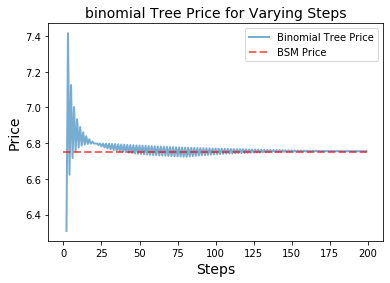

In [16]:
plt.plot(steps, prices, label="Binomial Tree Price", lw=2, alpha=0.6)
plt.plot([0,200], [bs_price, bs_price], "r--", label="BSM Price", lw=2, alpha=0.6)
plt.xlabel("Steps", size=14)
plt.ylabel("Price", size=14)
plt.title("binomial Tree Price for Varying Steps", size=14)
plt.legend()

In [17]:
payoff = PlainVanillaPayoff(option_type, strike_price)
settlement = calculation_date
am_exercise = AmericanExercise(settlement, maturity_date)
american_option = VanillaOption(payoff, am_exercise)

In [20]:
steps = range(2, 200, 1)
prices = [binomial_price(american_option, bsm_process, step) for step in steps]

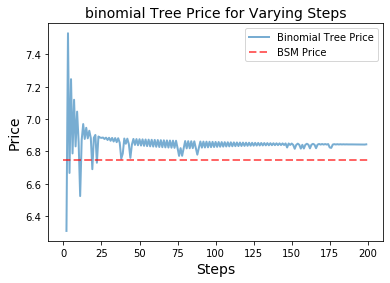

In [21]:
plt.plot(steps, prices, label="Binomial Tree Price", lw=2, alpha=0.6)
plt.plot([0,200], [bs_price, bs_price], "r--", label="BSM Price", lw=2, alpha=0.6)
plt.xlabel("Steps", size=14)
plt.ylabel("Price", size=14)
plt.title("binomial Tree Price for Varying Steps", size=14)
plt.legend()